In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


%matplotlib inline

In [ ]:
dataset = pd.read_csv('final_dataset.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

In [ ]:
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [ ]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [ ]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [ ]:
n_matches = dataset2.shape[0]
n_features = dataset2.shape[1] - 1
n_homewins = len(dataset2[dataset2.FTR == 'H'])
win_rate = (float(n_homewins) / (n_matches)) * 100
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

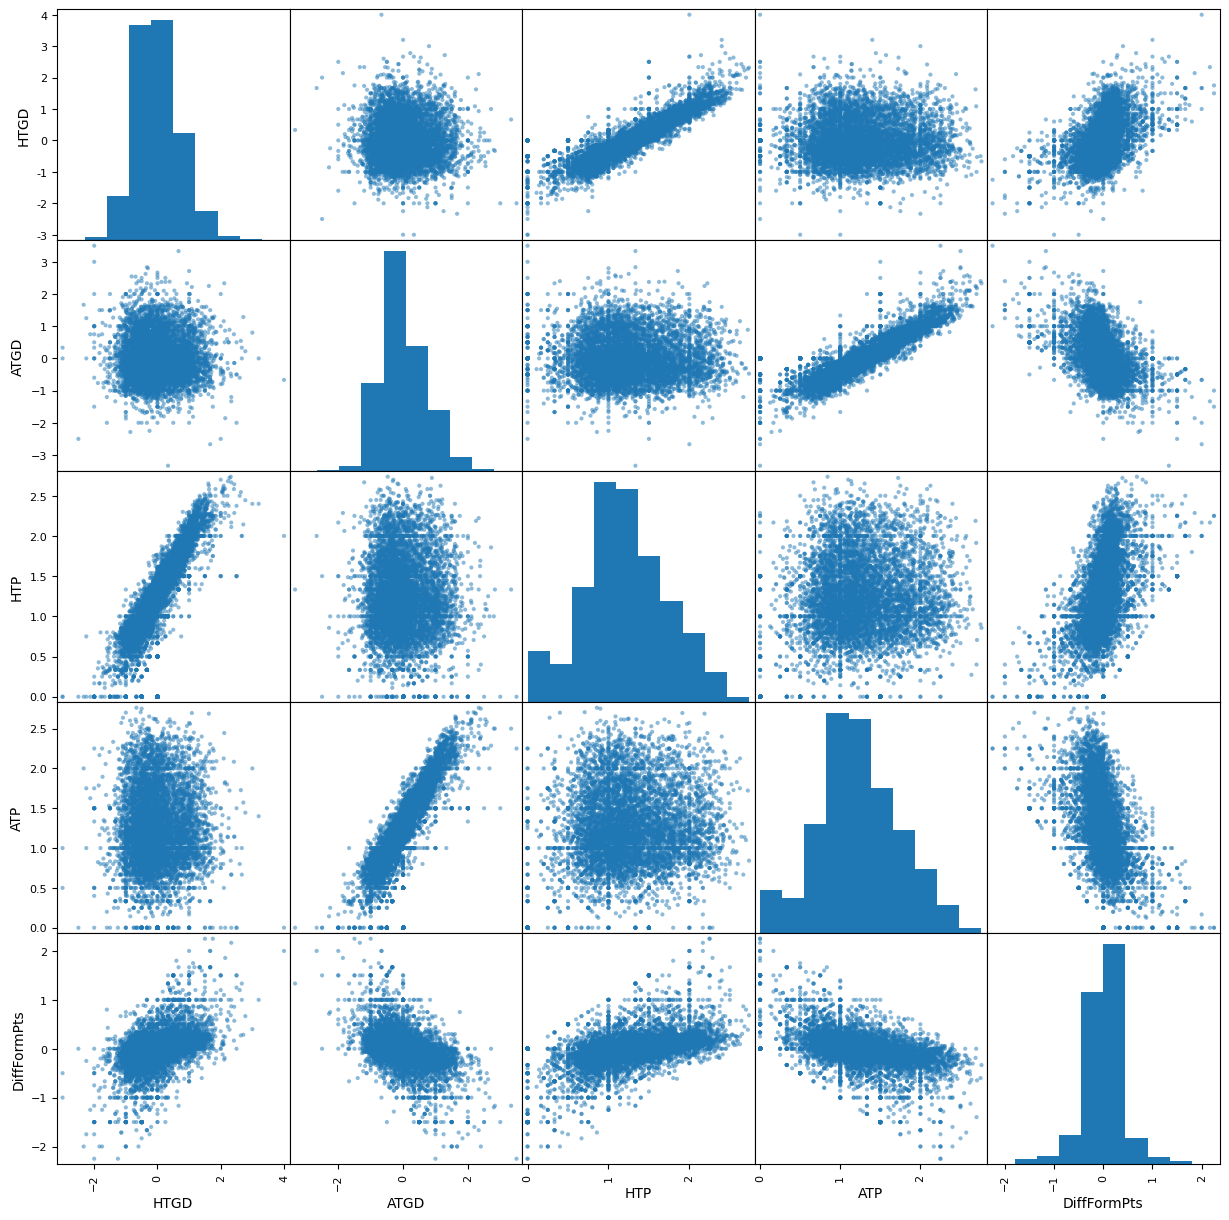

In [ ]:
scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [ ]:
X_all = dataset2.drop(['FTR'],axis=1)
y_all = dataset2['FTR']

cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])


In [ ]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

def preprocess_features(X):

    output = pd.DataFrame(index = X.index)
    for col, col_data in X.items():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        output = output.join(col_data)

    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [ ]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
1,1,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
2,2,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
3,3,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
4,4,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
5,5,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
6,6,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
7,7,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
8,8,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
9,9,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0


## Spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

# Applying the Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

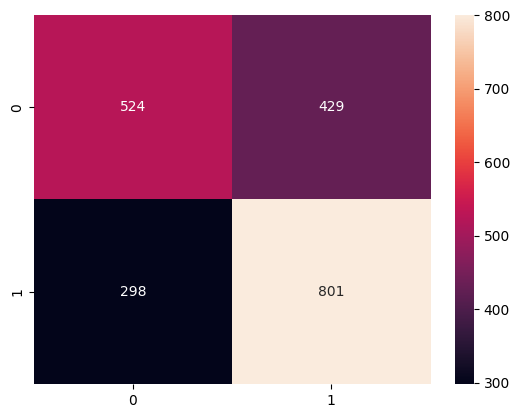

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.64      0.55      0.59       953
          NH       0.65      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.64      0.64      0.64      2052
weighted avg       0.64      0.65      0.64      2052



# Applying the SVM

In [ ]:
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

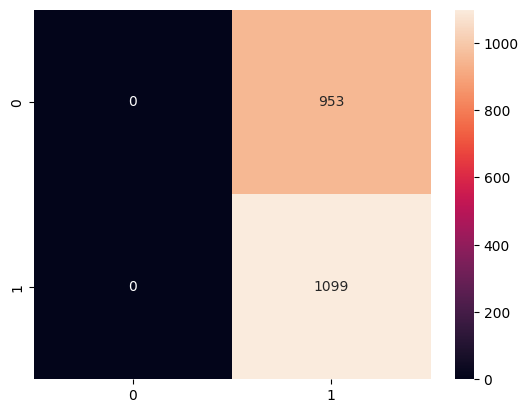

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       953
          NH       0.54      1.00      0.70      1099

    accuracy                           0.54      2052
   macro avg       0.27      0.50      0.35      2052
weighted avg       0.29      0.54      0.37      2052



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Applying the RandomForest

In [ ]:
classifier= RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', oob_score=True,random_state=1,n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

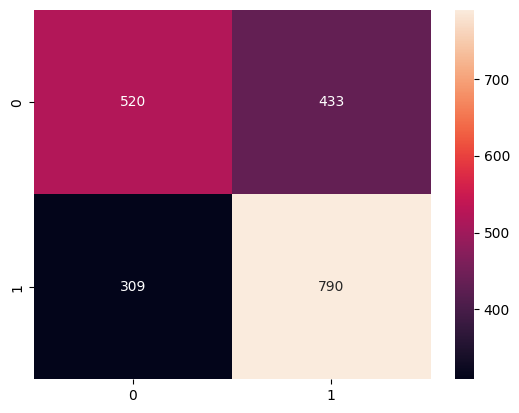

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.63      0.55      0.58       953
          NH       0.65      0.72      0.68      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.64      0.64      2052



# Applying the XGBoost

In [ ]:
le = LabelEncoder()
y_train = pd.Series(y_train, name='FTR')
y_test = pd.Series(y_test, name='FTR')

le.fit(pd.concat([y_train, y_test]))

y_train = pd.Series(le.transform(y_train), index=y_train.index, name='FTR')
y_test = pd.Series(le.transform(y_test), index=y_test.index, name='FTR')

In [ ]:
clf = xgb.XGBClassifier(seed=2)
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

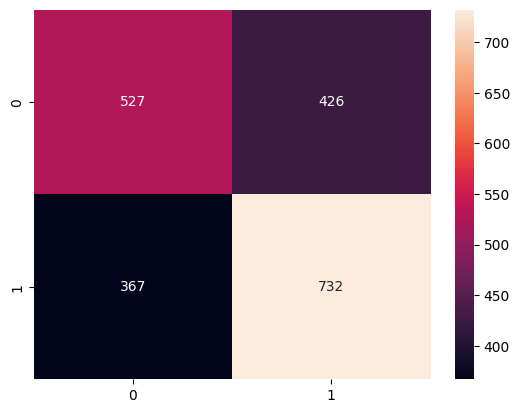

In [ ]:
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       953
           1       0.63      0.67      0.65      1099

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.61      0.61      0.61      2052



In [ ]:
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)


classifier_svm = SVC(kernel='rbf', random_state=0)
classifier_svm.fit(X_train, y_train)

classifier_rf = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier_rf.fit(X_train, y_train)

clf = xgb.XGBClassifier(seed=2)
clf.fit(X_train, y_train)


def evaluate_model(model, X_test, y_test):
    """Evaluates a model's performance using common metrics."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


models = {
    "Logistic Regression": classifier_lr,
    "SVM": classifier_svm,
    "Random Forest": classifier_rf,
    "XGBoost": clf
}


clf.fit(X_train, y_train)


results = {}
for model_name, model in models.items():
  accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
  results[model_name] = {
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1-Score": f1
  }

results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.645712,0.644834,0.645712,0.642602
SVM,0.535575,0.286841,0.535575,0.373594
Random Forest,0.638402,0.637272,0.638402,0.635476
XGBoost,0.613548,0.612322,0.613548,0.612427


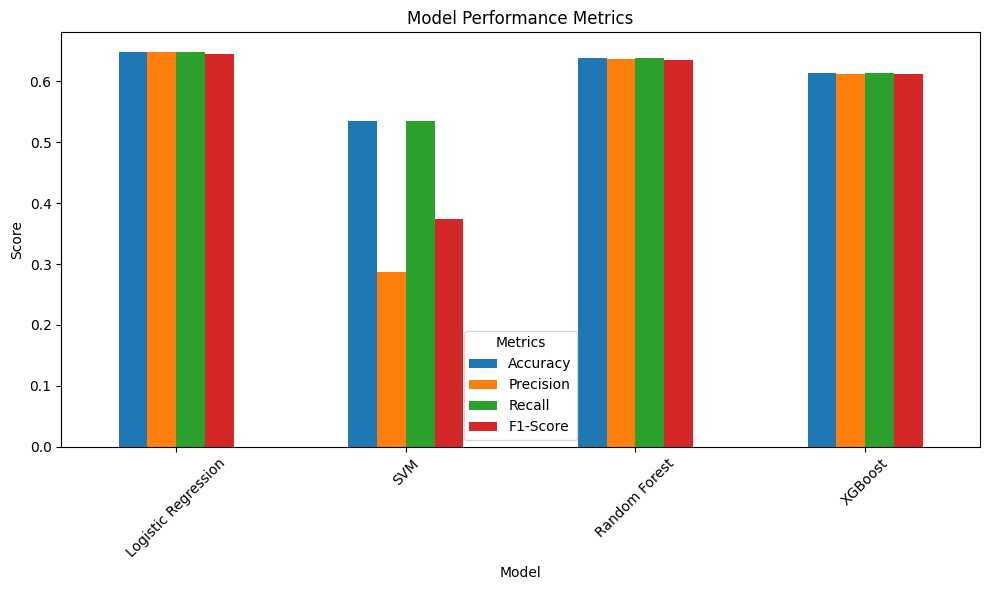

In [ ]:
data = {
    'index': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.6481481481481481, 0.5355750487329435, 0.6384015594541911, 0.6135477582846004],
    'Precision': [0.6474609473025051, 0.2868406328252948, 0.6372720950316849, 0.6123217861942499],
    'Recall': [0.6481481481481481, 0.5355750487329435, 0.6384015594541911, 0.6135477582846004],
    'F1-Score': [0.6447360720863545, 0.3735937661424975, 0.6354757766502028, 0.6124265062372377]
}

df = pd.DataFrame(data)
df = df.set_index('index')

ax = df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


In [ ]:

HTGD = float(input("Enter Home Team Goal Difference: "))
ATGD = float(input("Enter Away Team Goal Difference: "))
HTP = float(input("Enter Home Team Points: "))
ATP = float(input("Enter Away Team Points: "))
HM1 = input("Enter Home Team's last match result (W/D/L): ")
AM1 = input("Enter Away Team's last match result (W/D/L): ")



new_data = pd.DataFrame({
    'HTGD': [HTGD],
    'ATGD': [ATGD],
    'HTP': [HTP],
    'ATP': [ATP],
    'HM1': [HM1],
    'AM1': [AM1]
})


new_data.HM1 = new_data.HM1.astype('str')
new_data.AM1 = new_data.AM1.astype('str')
new_data = preprocess_features(new_data)

missing_cols = set(X_train.columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0
new_data = new_data[X_train.columns]


prediction = classifier_rf.predict(new_data)


try:
    if prediction[0] == 2:
        print("Predicted Result: No Win")
    else:
        print("Predicted Result:  Win")
except (IndexError, ValueError):
    print("Prediction error. Please ensure you have trained your model and the model output format is consistent.")